#1.Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

#2.Data Loading

In [4]:
heart = pd.read_csv("heart.csv")
heart.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


##2.1 Exploring the dataset

## 2.2 Information of Dataset

In [5]:
# using info() method to get the concise summary of the dataframe.
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [6]:
# creating a copy of dataset so that will not affect our original dataset.
heart_df = heart.copy()

In [7]:
# Renaming the column
heart_df = heart_df.rename(columns={'condition':'target'})
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 2.3 Checking null values

In [8]:
# Let's check if there is any Null value using isnull() method
heart_df.isnull().values.any()

np.False_

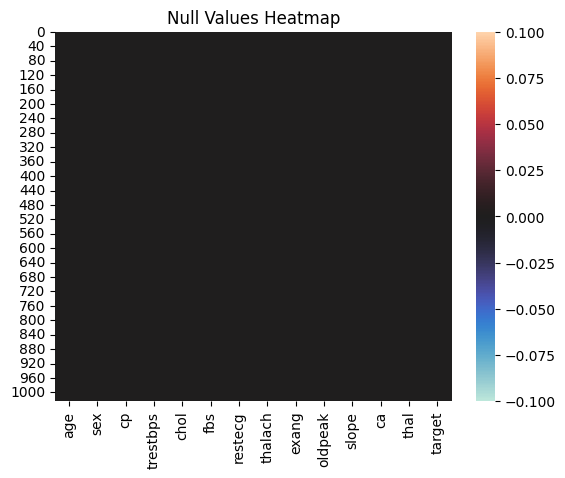

In [9]:
## this is the visual representation of null values present in data
sns.heatmap(heart_df.isnull(),cmap="icefire")
plt.title('Null Values Heatmap')
plt.show()

## 2.4 Checking Unique Values

In [10]:
# lets find unique values in dataset using nunique() method. it exclude NA values by default.
heart_df.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


#3.Exploratory Data analysis and visualisation

##3.1 Distribution of target variable

In [11]:
heart_df['target'].value_counts()

,count
target,
1,526
0,499


In [12]:
# Percentage of patients have and do not have heart disease
heart_df['target'].value_counts()/heart_df.shape[0]*100

,count
target,
1,51.317073
0,48.682927


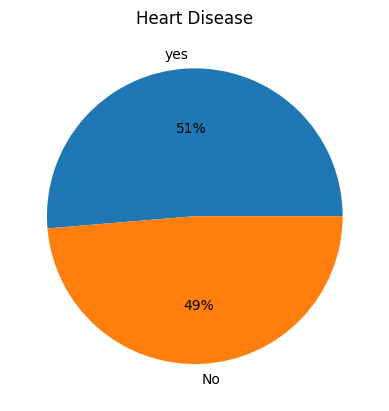

In [13]:
# Create a plot to display the percentage of the positive and negative heart disease
labels = ['yes', 'No']
values = heart_df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

## 3.2 Distribution of features

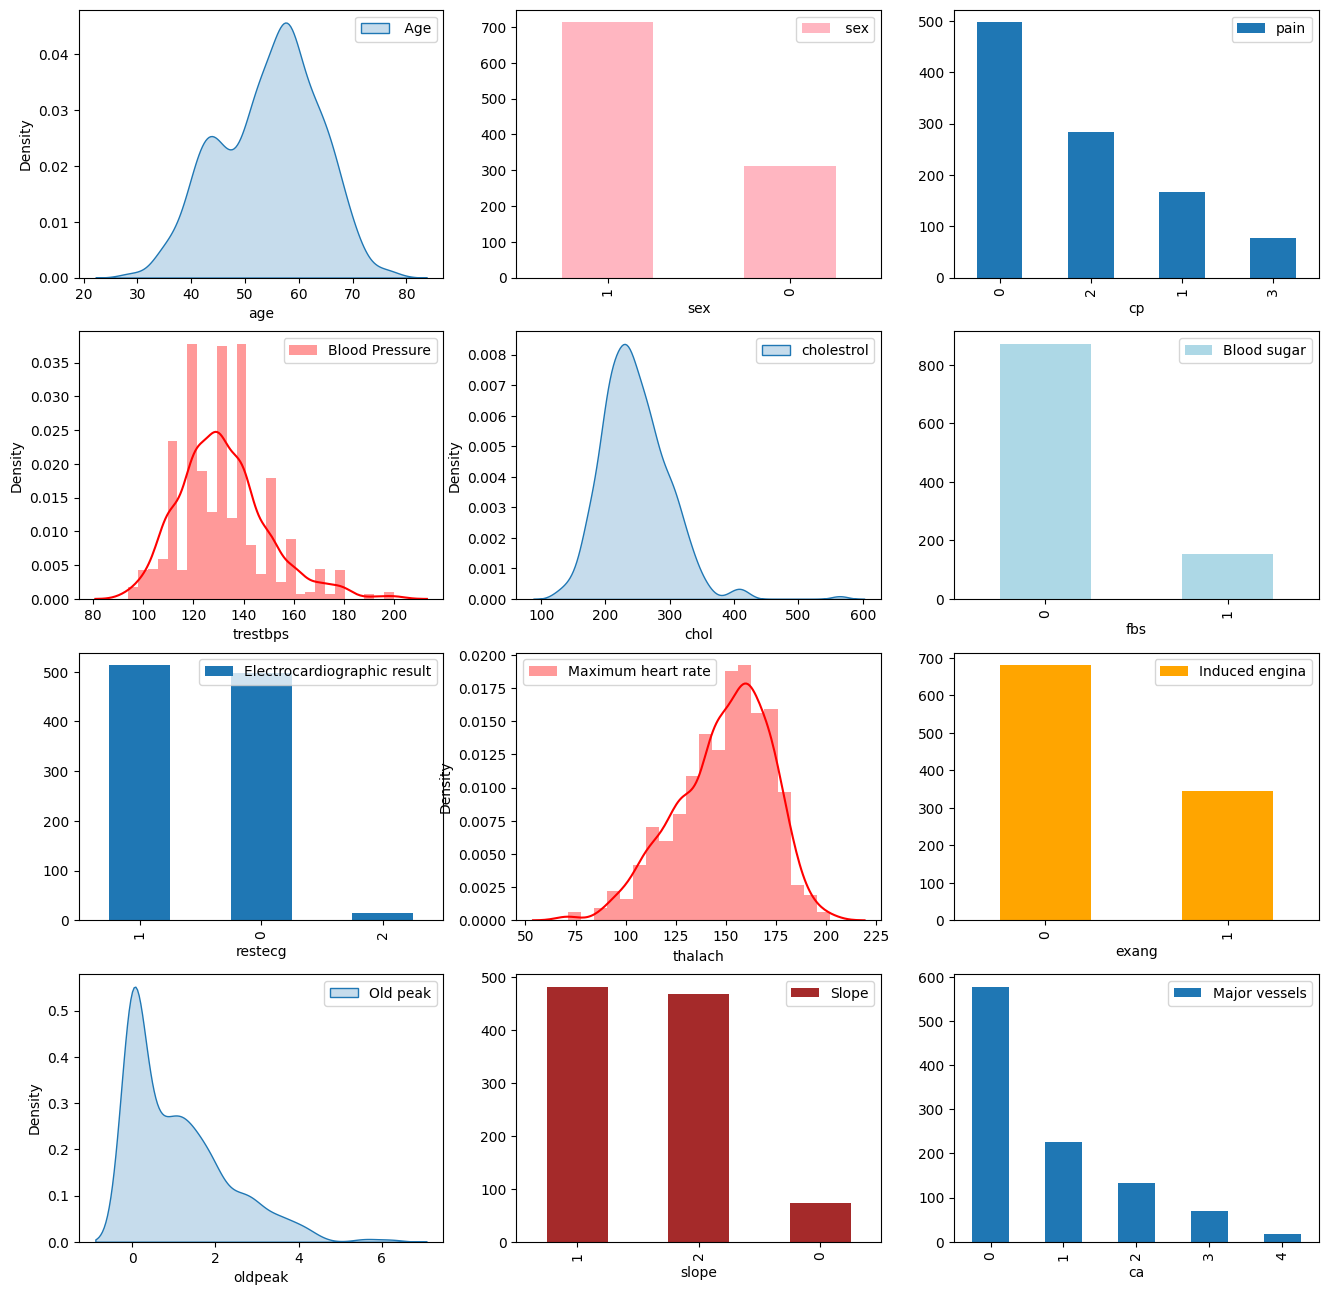

In [14]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(431)
sns.kdeplot(heart_df['age'],shade=True,label=' Age')
# plt.title ('Distribution of Age')
plt.legend()
fig = plt.subplot(432)
heart_df['sex'].value_counts().plot(kind='bar',label=' sex', color="lightpink")
plt.xlabel('sex')
# plt.title ('Distribution of sex')
plt.legend()
fig = plt.subplot(433)
heart_df['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('cp')
# plt.title ('Distribution of chest pain')
plt.legend()
fig = plt.subplot(434)
# sns.kdeplot(data['trtbps'],shade=True,label='blood pressure')
sns.distplot(heart_df['trestbps'], color="red",  kde= True,label='Blood Pressure')
# plt.title ('Distribution of blood pressure')
plt.legend()
fig = plt.subplot(435)
sns.kdeplot(heart_df['chol'],shade=True,label='cholestrol')
# plt.title ('Distribution of cholestrol')
plt.legend()
fig = plt.subplot(436)
heart_df['fbs'].value_counts().plot(kind='bar',label='Blood sugar', color="lightblue")
plt.xlabel('fbs')
# plt.title ('Distribution of blood sugar')
plt.legend()
fig = plt.subplot(437)
heart_df['restecg'].value_counts().plot(kind='bar',label='Electrocardiographic result')
plt.xlabel('restecg')
# plt.title ('Distribution of electrocardiographic result')
plt.legend()
fig = plt.subplot(438)
# sns.kdeplot(data['thalachh'],shade=True,label='Maximum heart rate')
sns.distplot(heart_df['thalach'], color="red",  kde= True,label='Maximum heart rate')
# plt.title ('Distribution of maximum heart rate')
plt.legend()
fig = plt.subplot(439)
heart_df['exang'].value_counts().plot(kind='bar',label='Induced engina', color="orange")
plt.xlabel('exang')
# plt.title ('Distribution of induced engina')
plt.legend()
fig = plt.subplot(4,3,10)
sns.kdeplot(heart_df['oldpeak'],shade=True,label='Old peak')
plt.xlabel('oldpeak')
# plt.title ('Distribution of old peak')
plt.legend()
fig = plt.subplot(4,3,11)
heart_df['slope'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('slope')
# plt.title ('Distribution of slope')
plt.legend()
fig = plt.subplot(4,3,12)
heart_df['ca'].value_counts().plot(kind='bar',label='Major vessels')
plt.xlabel('ca')
# plt.title ('Distribution of no. of major vessels')
plt.legend()
plt.show()

## 3.3 Age distribution based on heart disease

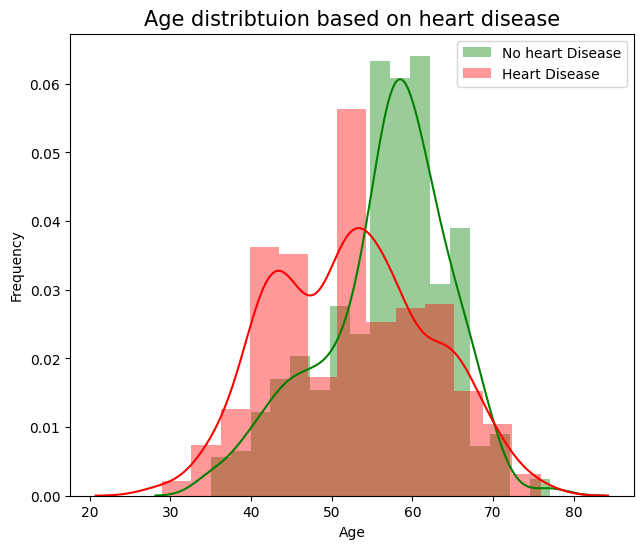

In [15]:
fig=plt.figure(figsize=(16,6))
fig = plt.subplot(121)
sns.distplot(heart_df[heart_df['target'] == 0]["age"], color='green',label='No heart Disease')
sns.distplot(heart_df[heart_df['target'] == 1]["age"], color='red',label='Heart Disease') #Red for heart disease
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age distribtuion based on heart disease', fontsize=15)
plt.legend()
plt.show()


In [16]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  35
Max age of people who do not have heart disease:  77
Average age of people who do not have heart disease:  56.569138276553105


In [17]:
# Get min, max and average of the age of the people have heart diseas
print('Min age of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['age']))
print('Max age of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['age']))
print('Average age of people who have heart disease: ', heart_df[heart_df['target'] == 1]['age'].mean())

Min age of people who have heart disease:  29
Max age of people who have heart disease:  76
Average age of people who have heart disease:  52.40874524714829


##3.4 Heart disease frequency according to chest pain types

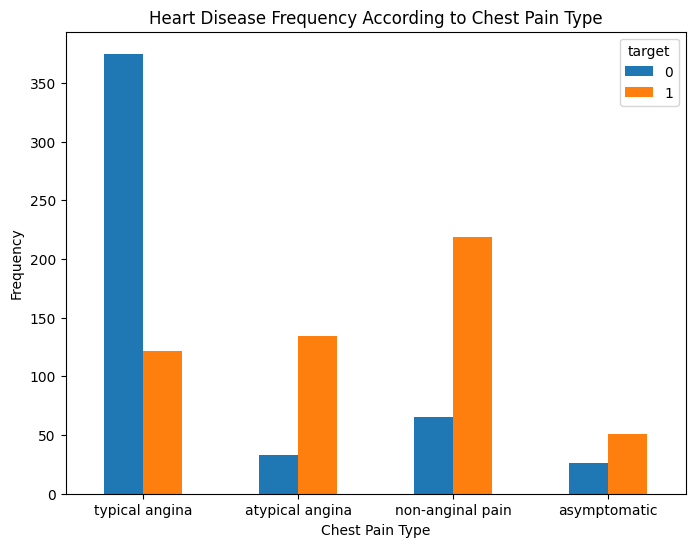

In [18]:
pd.crosstab(heart_df.cp,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

*We can see that most of the people with the heart disease have **asymptomatic** chest pain.*

##3.5 Blood pressure distribution based on heart rate

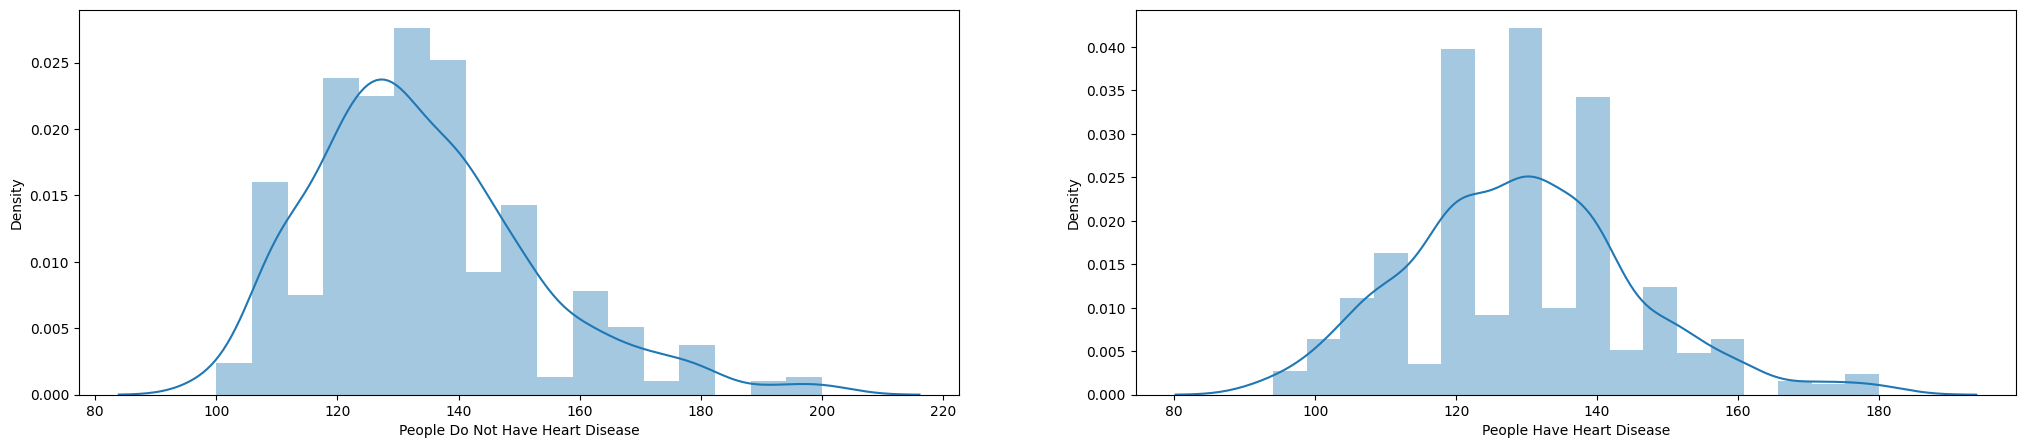

In [19]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [20]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  100
Max blood pressure of people who do not have heart disease:  200
Average blood pressure of people who do not have heart disease:  134.1062124248497


In [21]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', heart_df[heart_df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  94
Max blood pressure of people who have heart disease:  180
Average blood pressure of people who have heart disease:  129.24524714828897


##3.6 Cholesterol distribution based on heart disease

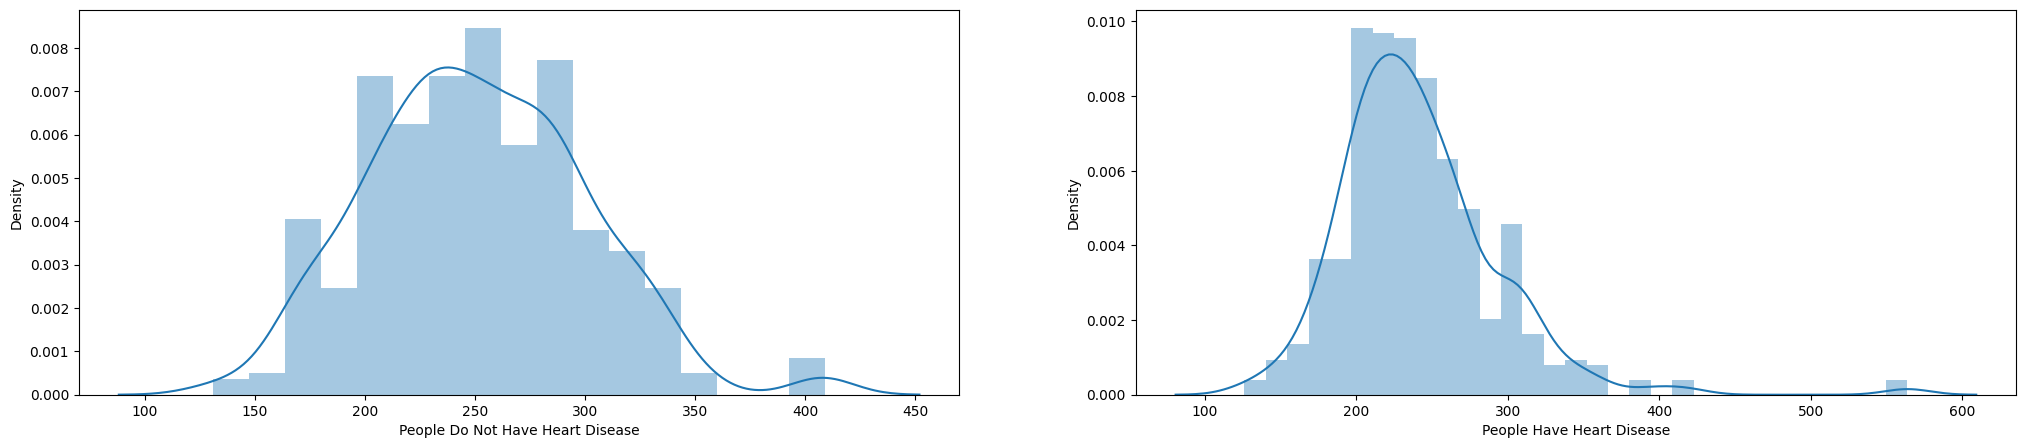

In [22]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [23]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['chol']))
print('Average cholestoral of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['chol'].mean())

Min cholestoral of people who do not have heart disease:  131
Max cholestoral of people who do not have heart disease:  409
Average cholestoral of people who do not have heart disease:  251.2925851703407


In [24]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['chol']))
print('Max cholestoral of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['chol']))
print('Average cholestorale of people who have heart disease: ', heart_df[heart_df['target'] == 1]['chol'].mean())

Min cholestoral of people who have heart disease:  126
Max cholestoral of people who have heart disease:  564
Average cholestorale of people who have heart disease:  240.97908745247148


##3.7 Heart Disease Frequency According to Fasting Blood Sugar

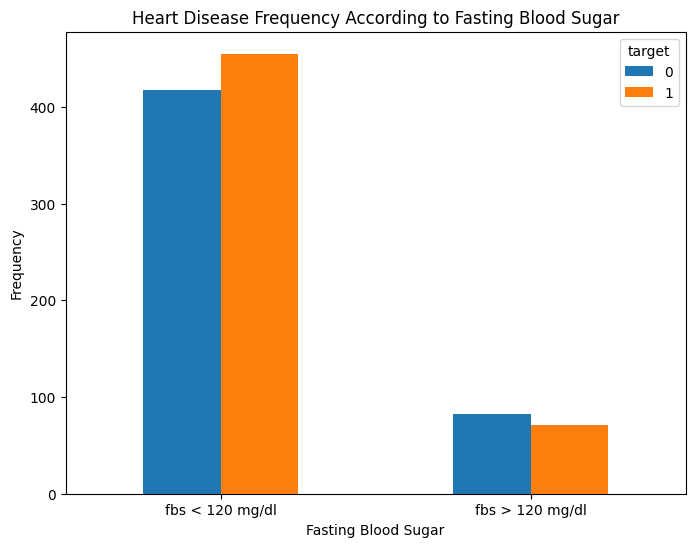

In [25]:
pd.crosstab(heart_df.fbs,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

##3.8 Heart Disease Frequency According to Resting Electrocardiographic Results

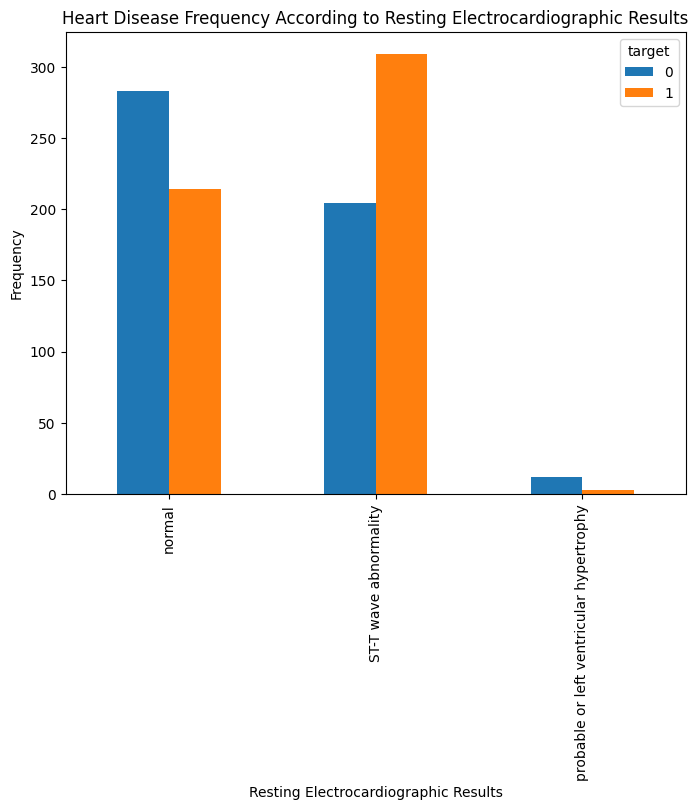

In [26]:
pd.crosstab(heart_df.restecg,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()


##3.9 Maximum heart rate distribution based on heart disease

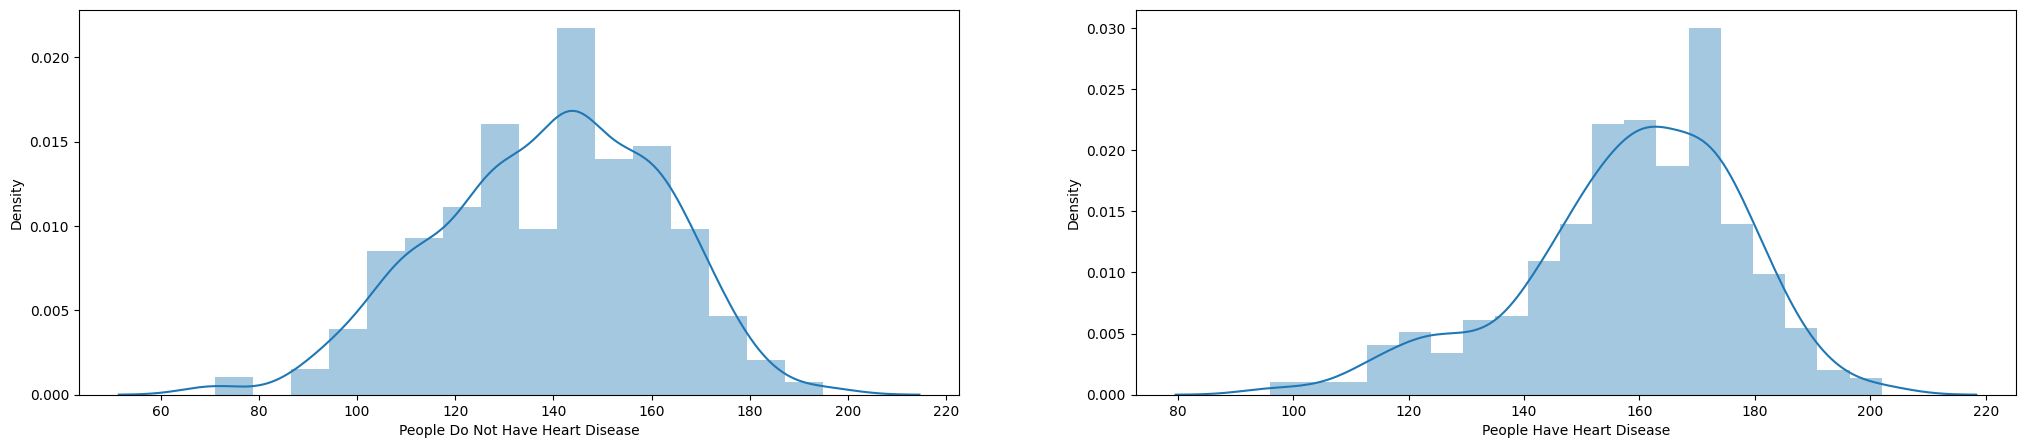

In [27]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

##3.10 ST depression distribution based on heart disease

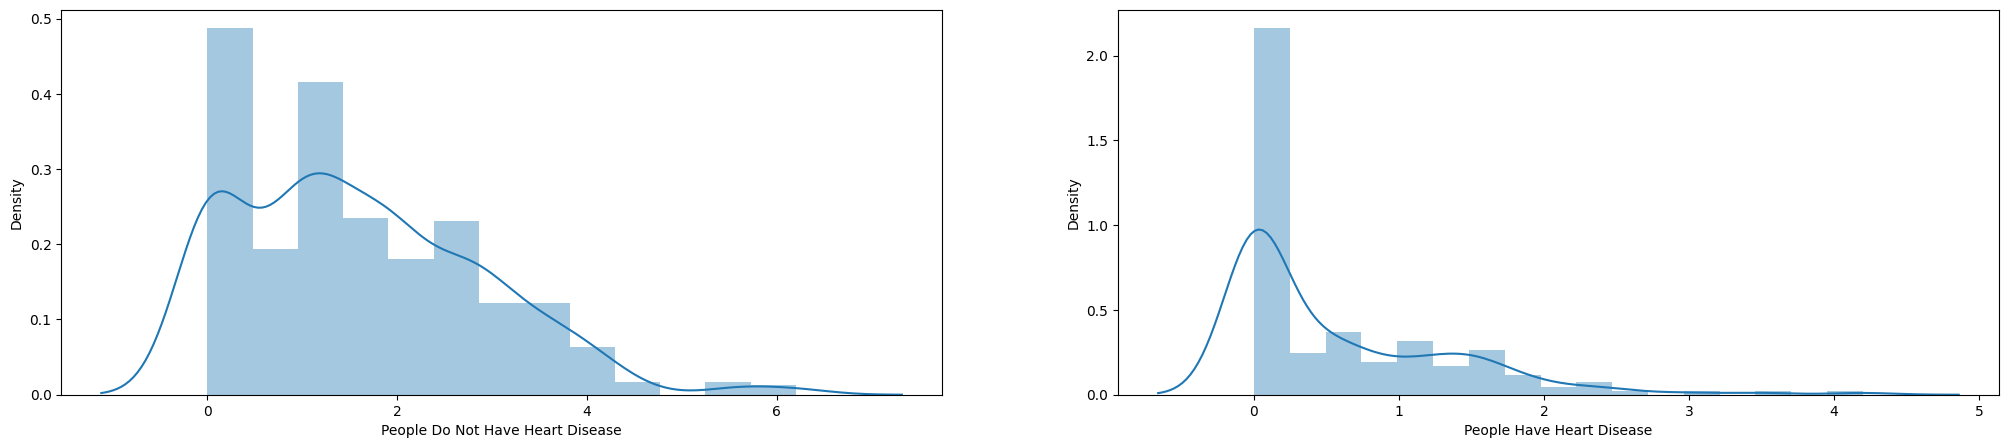

In [28]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [29]:
# Get min, max and average of the ST depression  of the people have heart diseas
print('Min ST depression of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['oldpeak'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  6.2
Average ST depression of people who do not have heart disease:  1.6002004008016033


In [30]:
# Get min, max and average of the ST depression of the people have heart diseas
print('Min ST depression of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['oldpeak']))
print('Average ST depression of people not have heart disease: ', heart_df[heart_df['target'] == 1]['oldpeak'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  4.2
Average ST depression of people not have heart disease:  0.5699619771863118


##3.11 Heart Disease Frequency According to Exercise Induced Angina

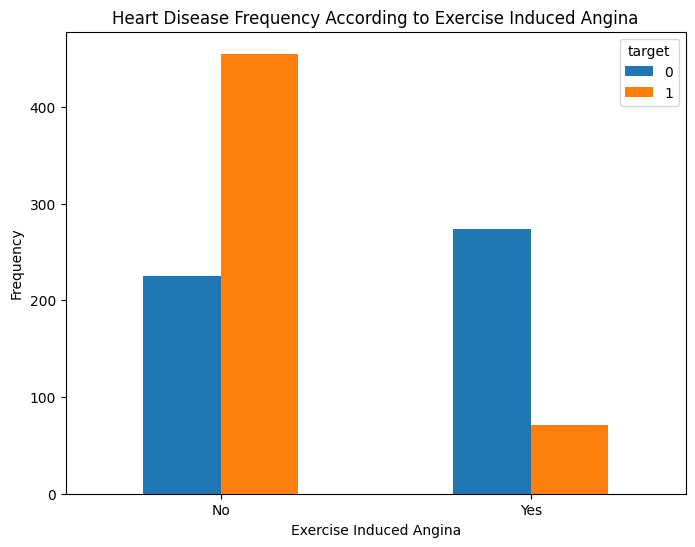

In [31]:
pd.crosstab(heart_df.exang,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

##3.12 Slope of the peak exercise ST segment based on the target

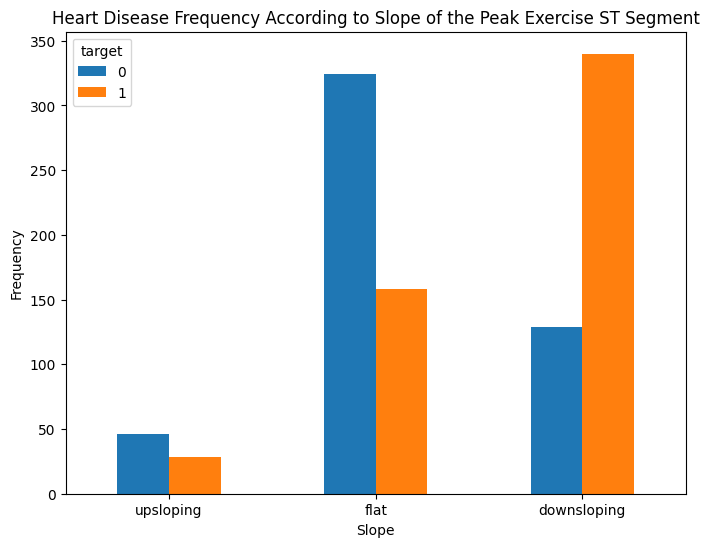

In [32]:
pd.crosstab(heart_df.slope,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

##3.13 Number of vessels based on the target

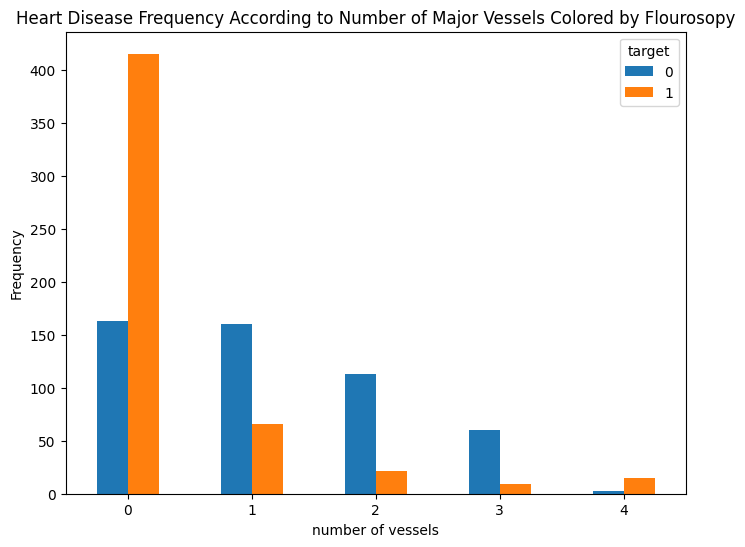

In [33]:
pd.crosstab(heart_df.ca,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

##3.14 Heart Disease Frequency According to Thalassemia

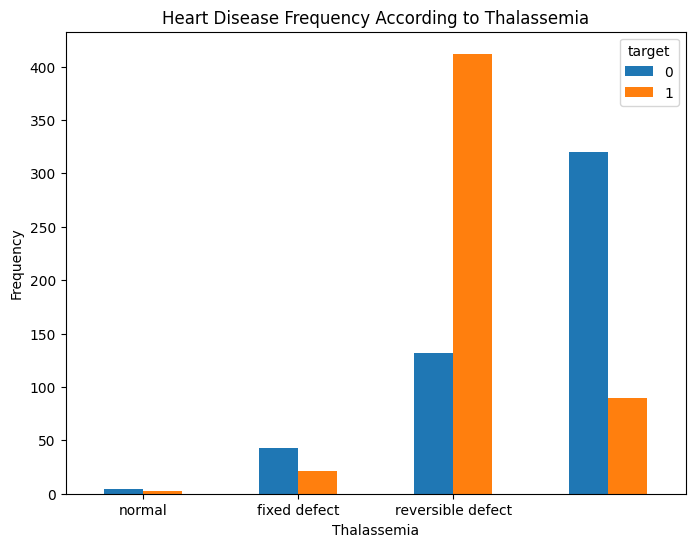

In [34]:
pd.crosstab(heart_df.thal,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

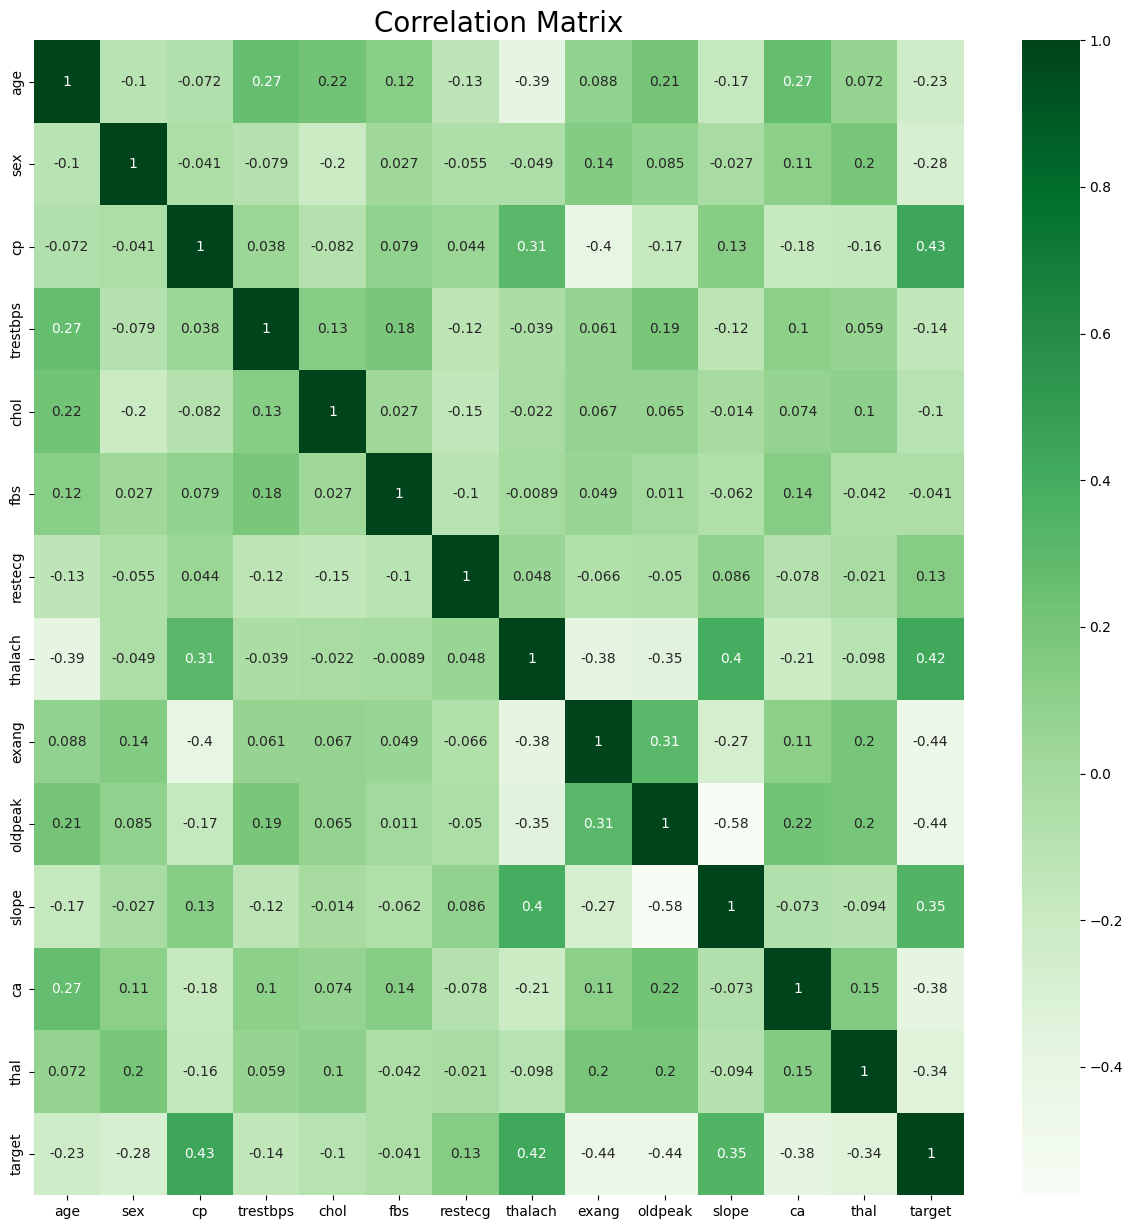

In [35]:
# Correlation map
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix', size=20)
sns.heatmap(heart_df.corr(), annot = True, cmap = "Greens")
plt.show()

#4.Model building and traning

In [36]:

#fixing our data in x and y. Here y contains target data and X contains rest all the features.
x= heart_df.drop(columns= 'target')
y= heart_df.target

# splitting our dataset into training and testing for this we will use train_test_split library.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

X_train size: (768, 13), X_test size: (257, 13)


In [37]:
#feature scaling
scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)


#5.Models Testing

##5.1 Logistic Regression Model

In [38]:
# creating Logistic Regression Model
LR_model= LogisticRegression()
LR_model.fit(x_train_scaler, y_train)
y_pred_LR= LR_model.predict(x_test_scaler)
LR_model.score(x_test_scaler,y_test)

0.7859922178988327

In [39]:
accuracy_lr = round((accuracy_score(y_test, y_pred_LR) * 100), 2)
print('Classification Report\n', classification_report(y_test, y_pred_LR))
print('Accuracy: {}%\n'.format(accuracy_lr))

# Adding Logistic Regression accuracy to the scores list
score_lr = accuracy_lr

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.70      0.77       132
           1       0.73      0.88      0.80       125

    accuracy                           0.79       257
   macro avg       0.80      0.79      0.78       257
weighted avg       0.80      0.79      0.78       257

Accuracy: 78.6%



In [40]:
cm = confusion_matrix(y_test, y_pred_LR)
cm

array([[ 92,  40],
       [ 15, 110]])

##5.2 K-nearest-neighbor classifier

In [41]:
# creating Knn Model
Knn_model= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Knn_model.fit(x_train_scaler, y_train)
y_pred_knn= Knn_model.predict(x_test_scaler)
Knn_model.score(x_test_scaler,y_test)

0.8326848249027238

In [42]:
# Calculating and displaying the classification report and accuracy
print('Classification Report\n', classification_report(y_test, y_pred_knn))
accuracy_knn = round((accuracy_score(y_test, y_pred_knn) * 100), 2)
print('Accuracy: {}%\n'.format(accuracy_knn))

# Adding K-NN accuracy to the scores list
score_knn = accuracy_knn

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       132
           1       0.80      0.88      0.84       125

    accuracy                           0.83       257
   macro avg       0.84      0.83      0.83       257
weighted avg       0.84      0.83      0.83       257

Accuracy: 83.27%



In [43]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[104,  28],
       [ 15, 110]])

##5.3 Naive Bayes

In [44]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train_scaler, y_train)
y_pred_naive_bayes = naive_bayes_model.predict(x_test_scaler)
naive_bayes_model.score(x_test_scaler, y_test)

0.8093385214007782

In [45]:
# Calculating and displaying the classification report and accuracy
print('Classification Report\n', classification_report(y_test, y_pred_naive_bayes))
accuracy_nb = round((accuracy_score(y_test, y_pred_naive_bayes) * 100), 2)
print('Accuracy: {}%\n'.format(accuracy_nb))

# Adding Naive Bayes accuracy to the scores list
score_nb = accuracy_nb

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.73      0.80       132
           1       0.76      0.90      0.82       125

    accuracy                           0.81       257
   macro avg       0.82      0.81      0.81       257
weighted avg       0.82      0.81      0.81       257

Accuracy: 80.93%



In [46]:
cm = confusion_matrix(y_test, y_pred_naive_bayes)
cm

array([[ 96,  36],
       [ 13, 112]])

##5.4 Random Forest Classifier

In [47]:
RF_model= RandomForestClassifier(n_estimators=20)
RF_model.fit(x_train_scaler, y_train)
y_pred_RF= RF_model.predict(x_test_scaler)
RF_model.score(x_test_scaler,y_test)

0.9649805447470817

In [48]:
# Calculating and displaying the classification report and accuracy
print('Classification Report\n', classification_report(y_test, y_pred_RF))
accuracy_rf = round((accuracy_score(y_test, y_pred_RF) * 100), 2)
print('Accuracy: {}%\n'.format(accuracy_rf))

# Adding Random Forest accuracy to the scores list
score_rf = accuracy_rf

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.98      0.95      0.96       125

    accuracy                           0.96       257
   macro avg       0.97      0.96      0.96       257
weighted avg       0.97      0.96      0.96       257

Accuracy: 96.5%



In [49]:
cm = confusion_matrix(y_test, y_pred_RF)
cm

array([[129,   3],
       [  6, 119]])

##5.5 Decison Tree Classifier

In [50]:
DT_model= DecisionTreeClassifier()
DT_model.fit(x_train_scaler, y_train)
y_pred_DT= DT_model.predict(x_test_scaler)
DT_model.score(x_test_scaler,y_test)


0.9260700389105059

In [51]:
# Calculating and displaying the classification report and accuracy
print('Classification Report\n', classification_report(y_test, y_pred_DT))
accuracy_dt = round((accuracy_score(y_test, y_pred_DT) * 100), 2)
print('Accuracy: {}%\n'.format(accuracy_dt))

# Adding Decision Tree accuracy to the scores list
score_dt = accuracy_dt

Classification Report
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       132
           1       0.91      0.94      0.92       125

    accuracy                           0.93       257
   macro avg       0.93      0.93      0.93       257
weighted avg       0.93      0.93      0.93       257

Accuracy: 92.61%



In [52]:
cm = confusion_matrix(y_test, y_pred_DT)
cm

array([[121,  11],
       [  8, 117]])

#6.Final Results

## 6.1 Comparing Accuracy of all Models

In [53]:
scores = [score_lr, score_nb, score_knn, score_dt, score_rf]
algorithms = ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "Random Forest"]

# Printing accuracy scores for all algorithms
for i in range(len(algorithms)):
    print("The accuracy score achieved using " + algorithms[i] + " is: " + str(scores[i]) + " %")


The accuracy score achieved using Logistic Regression is: 78.6 %
The accuracy score achieved using Naive Bayes is: 80.93 %
The accuracy score achieved using K-Nearest Neighbors is: 83.27 %
The accuracy score achieved using Decision Tree is: 92.61 %
The accuracy score achieved using Random Forest is: 96.5 %


## 6.2 Plotting Accuracy of All Models

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

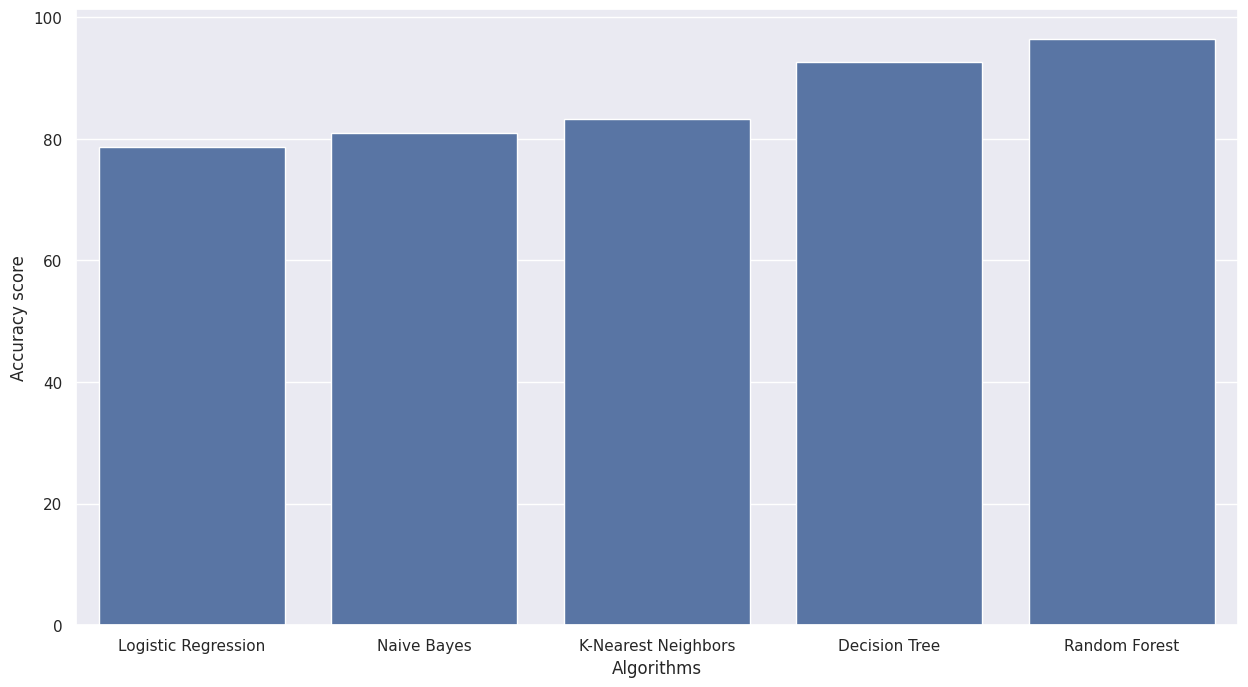

In [54]:
# Set the figure size
sns.set(rc={'figure.figsize': (15, 8)})

# Add x and y labels
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# Correct usage of sns.barplot()
sns.barplot(x=algorithms, y=scores)

## 6.3 Downloading the best model

In [60]:
import pickle

# Finding the best model based on accuracy
best_model_index = scores.index(max(scores))  # Index of the highest accuracy score
best_model = [LR_model, naive_bayes_model, Knn_model, DT_model, RF_model][best_model_index]  # Corresponding best model
best_model_name = algorithms[best_model_index]  # Corresponding algorithm name

# Saving the best model to a pickle file
with open('RF_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print(f"The best model is {best_model_name} with an accuracy of {scores[best_model_index]}%.")
print("The model has been saved as 'RF_model.pkl'.")


The best model is Random Forest with an accuracy of 96.5%.
The model has been saved as 'RF_model.pkl'.


In [61]:
from google.colab import files
files.download("RF_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>